In [20]:

import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch import nn
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import numpy as np

In [21]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'PyTorchLayerViz')))

from main import get_feature_maps


In [22]:
torch.manual_seed(42)

transform = transforms.Compose([
    transforms.Resize((256, 256)),            
    transforms.CenterCrop(224),
    transforms.ToTensor(),                    
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

/Users/simonepanicoprivat/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/simonepanicoprivat/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


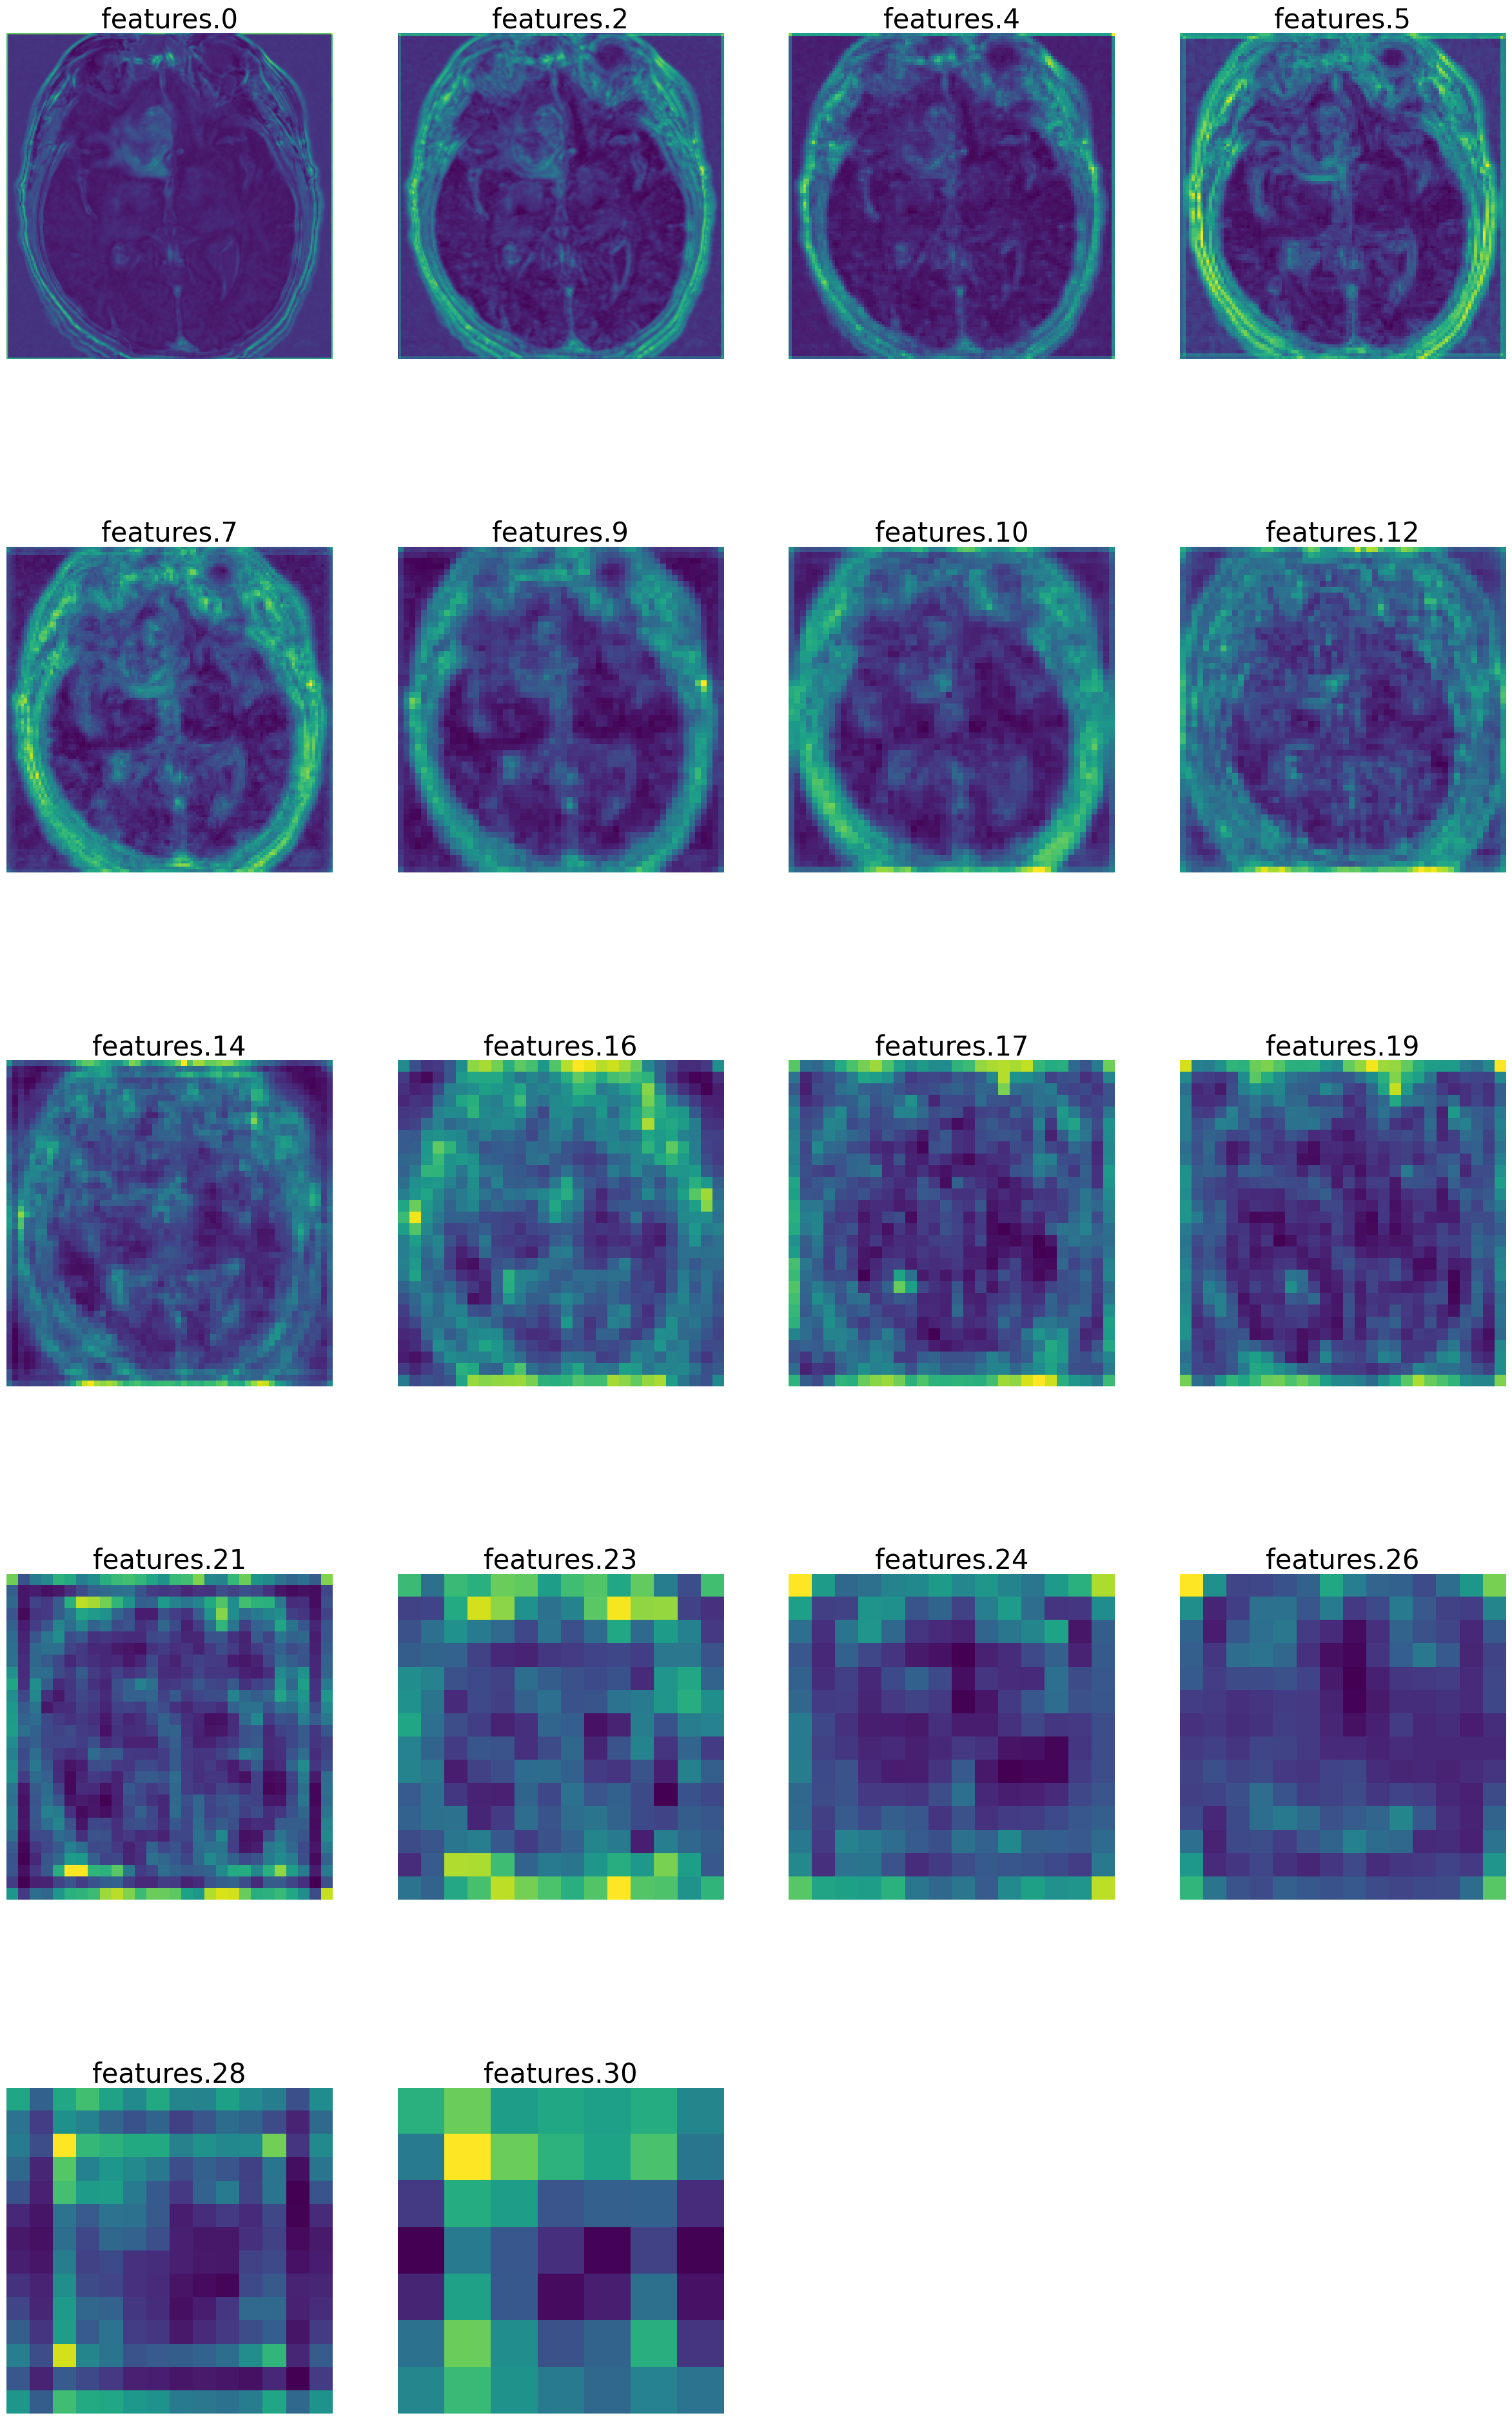

In [23]:
pretrained_model = models.vgg16(pretrained=True)
input_image_path = 'brain.tif'
layers_to_check= [nn.MaxPool2d, nn.Conv2d]

numpyArr = get_feature_maps(model = pretrained_model, layers_to_check = layers_to_check, input_image_path = input_image_path, transform = transform, print_image=True)


In [40]:
np.save('test_transform.npy', numpyArr)

In [25]:
array_scaled = (numpyArr[17] * 255).astype(np.uint8)
image = Image.fromarray(array_scaled)
image.show()

In [ ]:
input_image = Image.open('/Users/simonepanicoprivat/Library/Mobile Documents/com~apple~CloudDocs/PyTorchLayerViz/pictures/hamburger.jpg')
plt.imshow(input_image)
plt.show()
